In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

In [49]:
sns.set_style('whitegrid')

In [50]:
df = pd.read_csv('./data/SO_PSRatios.csv', header=0)

In [51]:
df['BusinessMonth'] = pd.to_datetime(df['BusinessMonth'])

In [52]:
df.columns

Index(['LocationNo', 'BusinessMonth', 'count_SalesTransactions_12mo',
       'count_BuyTransactions_12mo', 'qty_Purchased_12mo', 'qty_Sold_12mo',
       'Sales_12mo', 'Purchases_12mo', 'avg_QtyPerBuy', 'avg_CostPerBuy',
       'avg_ItemCost', 'PSRatio_12mo', '6moChange_CountBuyTransactions',
       '12moChange_CountBuyTransactions', '6moChange_CountSalesTransactions',
       '12moChange_CountSalesTransactions', '6moChange_QtyPurchased',
       '12moChange_QtyPurchased', '6moChange_AvgCostPerBuy',
       '12moChange_AvgCostPerBuy', '6moChange_PSRatio', '12moChange_PSRatio',
       'VersionNo', 'count_VersionNoMonths'],
      dtype='object')

In [53]:
cols_NoNa = [c for c in df.columns if c not in ['VersionNo']]
df_changes = df.dropna(subset=cols_NoNa, axis=0)

In [54]:
stats.pearsonr(df_changes['6moChange_AvgCostPerBuy'], df_changes['6moChange_CountBuyTransactions'])

(0.30120071878076604, 1.8688539410014694e-123)

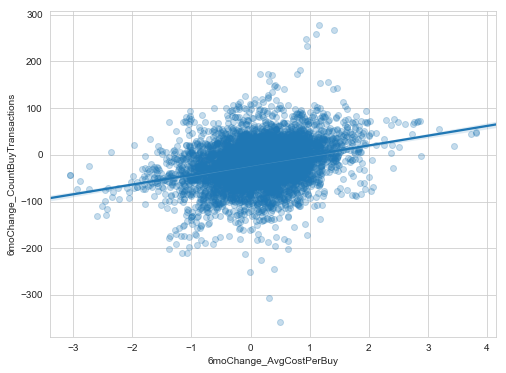

(0.30120071878076604, 1.8688539410014694e-123)


In [55]:
filt_6moCostInc = df_changes['6moChange_AvgCostPerBuy'] < 0
filt_12moCostInc = (df_changes['12moChange_AvgCostPerBuy'] < 0) 

fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(df_changes['6moChange_AvgCostPerBuy'], 
            df_changes['6moChange_CountBuyTransactions'], 
            scatter_kws=(dict(alpha=0.25)), ax=ax)
plt.show()
print(stats.pearsonr(df_changes['6moChange_AvgCostPerBuy'], 
            df_changes['6moChange_CountBuyTransactions']))

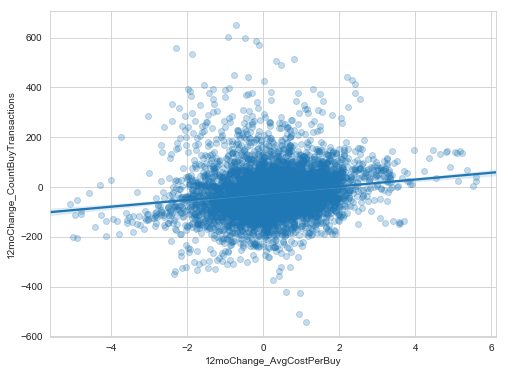

(0.16157450607823381, 1.1921811226624386e-35)


In [56]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(df_changes['12moChange_AvgCostPerBuy'], 
            df_changes['12moChange_CountBuyTransactions'], 
            scatter_kws=(dict(alpha=0.25)), ax=ax)
plt.show()
print(stats.pearsonr(df_changes['12moChange_AvgCostPerBuy'], 
            df_changes['12moChange_CountBuyTransactions']))

In [73]:
v1_filt = df_changes['VersionNo'] == 'v1'
v3_filt = df_changes['VersionNo'] == 'v3'
v1r3_filt = df_changes['VersionNo'] == 'v1.r3'
noso_filt = df_changes['VersionNo'].isna()

In [74]:
pd.set_option('display.max_columns', 22)

In [75]:
df_changes[df_changes['count_VersionNoMonths'] == 1]['BusinessMonth']

301    2016-10-01
309    2017-06-01
334    2019-07-01
366    2016-08-01
369    2016-11-01
376    2017-06-01
401    2019-07-01
500    2016-08-01
503    2016-11-01
509    2017-05-01
535    2019-07-01
832    2016-05-01
870    2019-07-01
2399   2018-03-01
2415   2019-07-01
2448   2016-09-01
2457   2017-06-01
2482   2019-07-01
2917   2018-03-01
2933   2019-07-01
3113   2017-10-01
3134   2019-07-01
5455   2016-04-01
5494   2019-07-01
5526   2016-08-01
5973   2016-05-01
6011   2019-07-01
6366   2016-08-01
6375   2017-05-01
6401   2019-07-01
6965   2016-04-01
6972   2016-11-01
6979   2017-06-01
7004   2019-07-01
Name: BusinessMonth, dtype: datetime64[ns]

In [76]:
df_changes[df_changes['count_VersionNoMonths'] == 1].groupby('VersionNo').mean()

,LocationNo,count_SalesTransactions_12mo,count_BuyTransactions_12mo,qty_Purchased_12mo,qty_Sold_12mo,Sales_12mo,Purchases_12mo,avg_QtyPerBuy,avg_CostPerBuy,avg_ItemCost,PSRatio_12mo,6moChange_CountBuyTransactions,12moChange_CountBuyTransactions,6moChange_CountSalesTransactions,12moChange_CountSalesTransactions,6moChange_QtyPurchased,12moChange_QtyPurchased,6moChange_AvgCostPerBuy,12moChange_AvgCostPerBuy,6moChange_PSRatio,12moChange_PSRatio,count_VersionNoMonths
VersionNo,,,,,,,,,,,,,,,,,,,,,,
v1,53.750000,10393.583333,1754.666667,42597.333333,32680.916667,178378.655167,32464.442342,24.073820,18.279626,0.768854,0.181467,-47.166667,-75.750000,-185.083333,-390.000000,-1379.250000,-2766.416667,-0.225612,-0.149764,-0.006392,-0.008850,1.0
v1.r3,50.500000,9278.000000,1690.000000,44850.250000,30012.833333,173430.930867,32294.024483,26.415189,18.902411,0.722313,0.184900,-4.333333,0.333333,-193.166667,-287.250000,-835.166667,741.166667,0.063018,0.235096,0.000525,0.000558,1.0
v2,42.000000,8959.333333,1431.666667,33647.666667,28943.000000,152381.647467,24086.225933,23.360875,16.734681,0.722602,0.156967,-18.666667,-2.666667,-148.000000,-397.333333,-847.333333,-17.333333,-0.552382,-0.647401,-0.006033,-0.002967,1.0
v3,46.142857,9722.714286,1632.571429,37537.857143,30749.000000,172513.058643,28418.939871,22.871000,17.258576,0.761025,0.166629,-21.857143,-53.714286,-283.428571,-517.571429,79.571429,-545.857143,-0.102569,-0.457630,0.000643,-0.003443,1.0


In [77]:
df_changes[df_changes['count_VersionNoMonths'] == 7].groupby('VersionNo').mean()

,LocationNo,count_SalesTransactions_12mo,count_BuyTransactions_12mo,qty_Purchased_12mo,qty_Sold_12mo,Sales_12mo,Purchases_12mo,avg_QtyPerBuy,avg_CostPerBuy,avg_ItemCost,PSRatio_12mo,6moChange_CountBuyTransactions,12moChange_CountBuyTransactions,6moChange_CountSalesTransactions,12moChange_CountSalesTransactions,6moChange_QtyPurchased,12moChange_QtyPurchased,6moChange_AvgCostPerBuy,12moChange_AvgCostPerBuy,6moChange_PSRatio,12moChange_PSRatio,count_VersionNoMonths
VersionNo,,,,,,,,,,,,,,,,,,,,,,
v1,60.222222,10848.666667,1834.444444,47527.222222,34232.888889,189986.627744,34519.784256,26.007520,18.784639,0.738812,0.182822,-63.666667,-119.222222,-349.444444,-524.888889,184.222222,-1210.666667,-0.277837,-0.405338,-0.005311,-0.011267,7.0
v2,59.000000,8374.500000,1410.500000,34146.500000,27543.500000,146523.938700,24233.024500,23.975963,16.999312,0.707468,0.163250,-23.000000,-46.000000,-225.500000,-347.500000,-1590.000000,-2737.000000,0.377078,-0.349948,0.004000,-0.004150,7.0
v3,53.000000,8341.833333,1562.666667,35000.666667,26462.333333,150728.437600,26991.090283,22.358962,17.208397,0.771305,0.177433,14.166667,2.000000,-192.500000,-464.833333,1587.166667,1761.000000,0.380301,0.604239,0.006567,0.010217,7.0


In [78]:
df_changes[df_changes['count_VersionNoMonths'] == 13].groupby('VersionNo').mean()

,LocationNo,count_SalesTransactions_12mo,count_BuyTransactions_12mo,qty_Purchased_12mo,qty_Sold_12mo,Sales_12mo,Purchases_12mo,avg_QtyPerBuy,avg_CostPerBuy,avg_ItemCost,PSRatio_12mo,6moChange_CountBuyTransactions,12moChange_CountBuyTransactions,6moChange_CountSalesTransactions,12moChange_CountSalesTransactions,6moChange_QtyPurchased,12moChange_QtyPurchased,6moChange_AvgCostPerBuy,12moChange_AvgCostPerBuy,6moChange_PSRatio,12moChange_PSRatio,count_VersionNoMonths
VersionNo,,,,,,,,,,,,,,,,,,,,,,
v1,48.0,11348.333333,1874.333333,53178.833333,35686.5,199224.073433,35597.457350,28.346524,18.899018,0.675308,0.181050,-33.500000,-115.833333,-326.333333,-712.0,489.166667,980.666667,-0.438507,-0.627516,-0.004633,-0.01030,13.0
v3,53.0,8210.333333,1556.000000,36047.833333,26151.5,151940.996783,26752.574883,23.003949,17.195037,0.748745,0.175017,-6.666667,7.500000,-131.500000,-324.0,1047.166667,2634.333333,-0.013360,0.366941,-0.002417,0.00415,13.0


In [79]:
df_changes[df_changes['count_VersionNoMonths'] == 20].groupby('VersionNo').mean()

,LocationNo,count_SalesTransactions_12mo,count_BuyTransactions_12mo,qty_Purchased_12mo,qty_Sold_12mo,Sales_12mo,Purchases_12mo,avg_QtyPerBuy,avg_CostPerBuy,avg_ItemCost,PSRatio_12mo,6moChange_CountBuyTransactions,12moChange_CountBuyTransactions,6moChange_CountSalesTransactions,12moChange_CountSalesTransactions,6moChange_QtyPurchased,12moChange_QtyPurchased,6moChange_AvgCostPerBuy,12moChange_AvgCostPerBuy,6moChange_PSRatio,12moChange_PSRatio,count_VersionNoMonths
VersionNo,,,,,,,,,,,,,,,,,,,,,,
v1,50.75,12196.500000,1921.250000,58510.000000,38614.250000,212160.5358,39078.042150,30.548442,20.322360,0.668781,0.188575,-47.75,-82.500000,-317.500000,-699.750000,-1342.5,-1388.5,0.365996,0.178566,0.002150,-0.000050,20.0
v3,53.00,8100.166667,1543.333333,36899.333333,25969.166667,153377.7222,26674.337817,24.068406,17.357633,0.724947,0.173017,-7.50,-17.666667,-88.166667,-202.333333,1059.5,1825.0,0.152867,0.159703,-0.001083,-0.004483,20.0


In [81]:
df_changes[noso_filt][df_changes['BusinessMonth'] == '10/1/2017'].mean()

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


LocationNo                               58.294737
count_SalesTransactions_12mo           8860.778947
count_BuyTransactions_12mo             1517.673684
qty_Purchased_12mo                    33932.526316
qty_Sold_12mo                         27933.010526
Sales_12mo                           155036.359317
Purchases_12mo                        26100.048136
avg_QtyPerBuy                            22.034337
avg_CostPerBuy                           16.985281
avg_ItemCost                              0.775023
PSRatio_12mo                              0.167518
6moChange_CountBuyTransactions            2.778947
12moChange_CountBuyTransactions          -6.494737
6moChange_CountSalesTransactions       -184.042105
12moChange_CountSalesTransactions      -456.094737
6moChange_QtyPurchased                 -507.884211
12moChange_QtyPurchased                -830.189474
6moChange_AvgCostPerBuy                   0.183700
12moChange_AvgCostPerBuy                  0.312538
6moChange_PSRatio              

Index(['1/1/2017', '1/1/2018', '1/1/2019', '10/1/2016', '10/1/2017',
       '10/1/2018', '11/1/2016', '11/1/2017', '11/1/2018', '12/1/2016',
       '12/1/2017', '12/1/2018', '2/1/2017', '2/1/2018', '2/1/2019',
       '3/1/2017', '3/1/2018', '3/1/2019', '4/1/2016', '4/1/2017', '4/1/2018',
       '4/1/2019', '5/1/2016', '5/1/2017', '5/1/2018', '5/1/2019', '6/1/2016',
       '6/1/2017', '6/1/2018', '6/1/2019', '7/1/2016', '7/1/2017', '7/1/2018',
       '8/1/2016', '8/1/2017', '8/1/2018', '9/1/2016', '9/1/2017', '9/1/2018'],
      dtype='object', name='BusinessMonth')

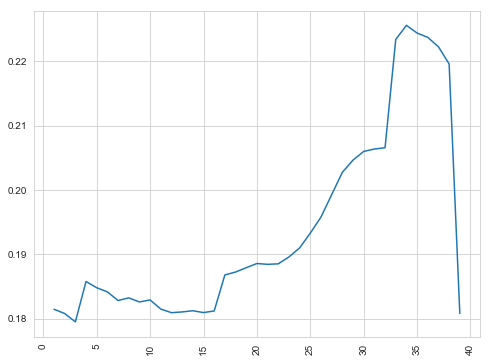

In [89]:
plt_v1 = df_changes[v1_filt].groupby('count_VersionNoMonths').mean().reset_index()
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(plt_v1['count_VersionNoMonths'], plt_v1['PSRatio_12mo'], '-')
ax.tick_params(axis='x', rotation=90)
plt.show()

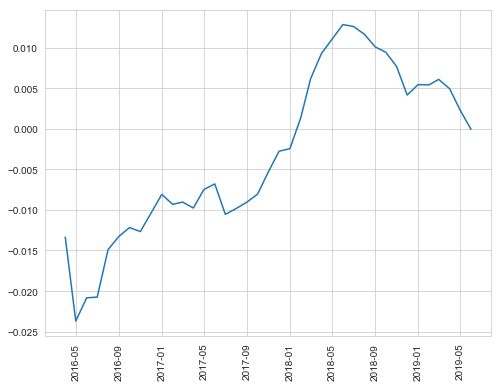

In [87]:
plt_noso = df_changes[v1_filt].groupby('BusinessMonth').mean().reset_index()
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(plt_noso['BusinessMonth'], plt_noso['12moChange_PSRatio'], '-')
ax.tick_params(axis='x', rotation=90)
plt.show()

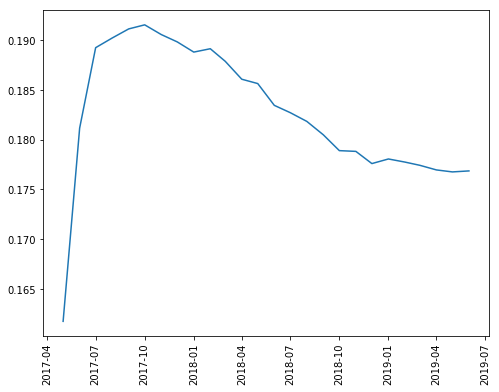

In [70]:
df_v3 = df[v3_filt].groupby('BusinessMonth').mean().reset_index().sort_values('BusinessMonth')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_v3['BusinessMonth'], df_v3['PSRatio_12mo'], '-')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [74]:
df[v3_filt]['LocationNo'].unique()

array([  5,   6,   8,  39,  50, 103, 112, 122, 124], dtype=int64)

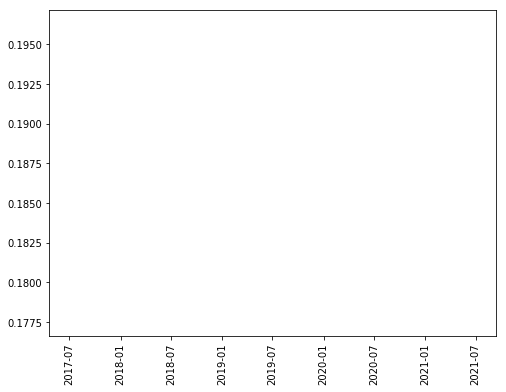

In [80]:
df_v1r3 = df[v1r3_filt].groupby('BusinessMonth').mean().reset_index().sort_values('BusinessMonth')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_v1r3['BusinessMonth'], df_v1r3['PSRatio_12mo'], '-')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [81]:
df_v1r3

,BusinessMonth,LocationNo,count_BuyTransactions_12mo,qty_Purchased_12mo,qty_Sold_12mo,Sales_12mo,Purchases_12mo,avg_QtyPerBuy,avg_CostPerBuy,avg_ItemCost,PSRatio_12mo,6moChange_CountBuyTransactions,12moChange_CountBuyTransactions,6moChange_AvgCostPerBuy,12moChange_AvgCostPerBuy
0,2019-07-01,60.285714,1655.428571,44068.142857,29358.785714,168393.249964,31555.001671,26.469089,18.86228,0.720289,0.186886,-2.642857,0.0,0.01347,0.165174
